<a href="https://colab.research.google.com/github/rca32/pythoncs_2019/blob/master/12_pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 샘플 Data 읽어 드리기
# pandas, numpy matplotlib 설정

In [0]:
!git clone https://github.com/rca32/pythoncs_2019.git data
  
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20

# Selecting , filtering 

1.    **label**  선택하기
2.   **position**  선택하기



In [0]:
df = pd.read_csv("data/titanic.csv")

### [] -> 우리가 아는 일반적인 파이선의 data선택

DataFrame에서 하나의 컬럼을  선택

In [0]:
df['Age']

2개의 컬럼을 선택

In [0]:
df[['Age', 'Fare']]

## 하지만 범위 선택은 row를 선택

In [0]:
df[10:15]

### `loc` 와 `iloc`을 이용한 좀더 체계적인 data selecting

`[]`을 사용하면 column이나 row를 동시에 선택이 안됨...

* `loc`: selection by label
* `iloc`: selection by position

In [0]:
df = df.set_index('Name')

In [0]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

In [0]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

`iloc` 는 위치로 선택 가능

In [0]:
df.iloc[0:2,1:3]

선택된 값의 변경도 가능

In [0]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [0]:
df

### Boolean indexing (filtering)

In [0]:
df['Fare'] > 50

In [0]:
df[df['Fare'] > 50]

연습하기

남성 승객의 모든 행(row)을 선택하고 승객의 평균 연령을 계산한다. 
여성 승객은.

In [0]:
df = pd.read_csv("data/titanic.csv")

연습하기 

 타이타닉에 50세 이상의 승객이 몇 명이었는가?
  타이타닉에 50세이상70세 이이하 의 승객이 몇 명이었는가?

#  group-by

### split-apply-combine

In [0]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


### aggregating functions

In [0]:
df['data'].sum()

90

In [0]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


### Groupby: applying functions per group

<img src="https://github.com/jorisvandenbossche/pandas-tutorial/raw/8308a6eb7d144fff95a6853930e3be4e8ddb2e0f/img/splitApplyCombine.png">

 

In [0]:
df.groupby('key').sum()

In [0]:
df.groupby('key')['data'].sum()

###  titanic 분석해보기

In [0]:
df = pd.read_csv("data/titanic.csv")

In [0]:
df.head()

연습하기:
각 성별  평균 구하기

In [0]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

연습하기:

모든 승객의 평균 생존율을 계산한다.

In [0]:
df['Survived'].mean()

0.3838383838383838

연습하기:

25세 이하 승객의 평균 생존율을 계산한다.

0.4119601328903654

연습하기:

남녀 생존률

In [0]:
df.groupby('Sex')['Survived'].mean()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

In [0]:
# %load snippets/01-pandas_introduction80.py

연습하기:

PClass별 생존율 그리기 

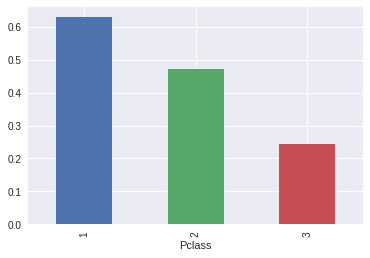

In [0]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

연습하기:

각 나이대별 별 생존율 그리기 

In [0]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

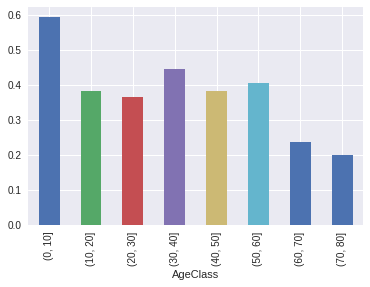

In [0]:
df.groupby('AgeClass')['Survived'].mean().plot(kind='bar')

# time series 

In [0]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [0]:
no2.index

In [0]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

In [0]:
no2['2012-01':'2012-03']

In [0]:
no2.index.hour

In [0]:
no2.index.year

# resample

In [0]:
no2.plot(figsize=(16,8))

Daily로 변경

In [0]:
no2.head()

In [0]:
no2.resample('M').mean().head(9)

In [0]:
no2.resample('M').max().head(17)

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
 

In [0]:
no2.resample('M').mean().plot() # 'A'

In [0]:
no2['2012'].resample('D').mean().plot()

In [0]:
#https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats
no2.loc['2009':, 'VERS'].resample('M').agg(['mean', 'median']).plot()


In [0]:
no2.resample('A').mean().plot()
no2.mean(axis=1).resample('A').mean().plot(color='k', linestyle='--', linewidth=4)

# 응용~ 월별 그래프 

# 응용~ 시간별

In [0]:
no2.groupby(no2.index.weekday).mean().plot()

응용~ 시간별

BASCH 지역에 주일과 주말과 차이를 시간대별로 구하세요


In [0]:
no2['weekday'] = no2.index.weekday
no2['weekend'] = no2['weekday'].isin([5, 6])


In [0]:
no2.groupby(['weekend',no2.index.hour])['BASCH'].mean().unstack(0).plot()
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [0]:
no2['hour'] = no2.index.hour
no2.pivot_table(columns='weekend', index='hour', values='BASCH')

#연습

유럽기준이 시간당 평균이 200이 넘는 날이 1년에 18일 이상 되면 안된다.  
최악의 경우 80일이 넘을 경우 Euro에서 제재를 가할수 있다.


In [0]:
# re-reading the data to have a clean version
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [0]:
초과 = no2>200

In [0]:
ax = 초과.groupby(초과.index.year).sum().plot(kind='bar',figsize=(16,6))
ax.axhline(18,color='k',linestyle='--')
ax.axhline(68,color='r',linestyle='--')